In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


# Reduce File Size into chunks

In [ ]:
# Load the large CSV file
file_path = 'dmt-2024-2nd-assignment/training_set_VU_DM.csv'
data = pd.read_csv(file_path)

# Define the size of each chunk
chunk_size = 500000  # This number can change 

# Split the CSV into chunks
for i in range(0, len(data), chunk_size):
    chunk = data.iloc[i:i + chunk_size]
    chunk.to_csv(f'chunk_{i//chunk_size}.csv', index=False)


In [3]:
df = pd.read_csv("chunk_0.csv")
df['date_time'] = pd.to_datetime(df['date_time'])
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [4]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

# Unique values

In [5]:
for col in df.columns:
    if df[col].dtype != np.float_:
        print('Unique values for {}: {}'.format(col, len(np.unique(df[col]))))

Unique values for srch_id: 20058
Unique values for date_time: 20044
Unique values for site_id: 32
Unique values for visitor_location_country_id: 145
Unique values for prop_country_id: 142
Unique values for prop_id: 81716
Unique values for prop_starrating: 6
Unique values for prop_brand_bool: 2
Unique values for position: 40
Unique values for promotion_flag: 2
Unique values for srch_destination_id: 5808
Unique values for srch_length_of_stay: 26
Unique values for srch_booking_window: 344
Unique values for srch_adults_count: 9
Unique values for srch_children_count: 8
Unique values for srch_room_count: 8
Unique values for srch_saturday_night_bool: 2
Unique values for random_bool: 2
Unique values for click_bool: 2
Unique values for booking_bool: 2


# Booking/Clicks checks in the dataset

In [6]:
# Calculate the total number of clicks
total_clicks = df['click_bool'].sum()

# Calculate the total number of bookings
total_bookings = df['booking_bool'].sum()

# Print the results
print(f"Total number of clicks: {total_clicks}")
print(f"Total number of bookings: {total_bookings}")

# Total rows in the DataFrame
total_actions = len(df)

# Calculate the total number of clicks
total_clicks = df['click_bool'].sum()

# Calculate the total number of bookings
total_bookings = df['booking_bool'].sum()

# Calculate percentages
percentage_total_clicks = (total_clicks / total_actions) * 100
percentage_total_bookings = (total_bookings / total_actions) * 100

# Print the results
print(f"Percentage of total actions that resulted in clicks: {percentage_total_clicks:.2f}%")
print(f"Percentage of total actions that resulted in bookings: {percentage_total_bookings:.2f}%")

Total number of clicks: 22414
Total number of bookings: 13905
Percentage of total actions that resulted in clicks: 4.48%
Percentage of total actions that resulted in bookings: 2.78%


In [7]:
# Calculate the number of unique searches that resulted in at least one click
searches_with_clicks = df.groupby('srch_id')['click_bool'].max().sum()

# Calculate the number of unique searches that resulted in at least one booking
searches_with_bookings = df.groupby('srch_id')['booking_bool'].max().sum()

# Print the results
print(f"Total searches that resulted in at least one click: {searches_with_clicks}")
print(f"Total searches that resulted in at least one booking: {searches_with_bookings}")

# Calculate total number of unique searches
total_searches = df['srch_id'].nunique()

# Calculate the number of unique searches that resulted in at least one click
searches_with_clicks = df.groupby('srch_id')['click_bool'].max().sum()

# Calculate the number of unique searches that resulted in at least one booking
searches_with_bookings = df.groupby('srch_id')['booking_bool'].max().sum()

# Calculate percentages
percentage_clicks = (searches_with_clicks / total_searches) * 100
percentage_bookings = (searches_with_bookings / total_searches) * 100

# Print the results
print(f"Percentage of searches that resulted in at least one click: {percentage_clicks:.2f}%")
print(f"Percentage of searches that resulted in at least one booking: {percentage_bookings:.2f}%")


Total searches that resulted in at least one click: 20058
Total searches that resulted in at least one booking: 13905
Percentage of searches that resulted in at least one click: 100.00%
Percentage of searches that resulted in at least one booking: 69.32%


# Missing data checks

In [8]:
missing_data = df.isna().mean().round(4) * 100
missing_data = pd.DataFrame(missing_data).reset_index()
missing_data.columns = ["column", "missing"]
missing_data.query("missing > 0", inplace=True)

/var/folders/lf/9kmpp6sj6r5336sq3nv74tjw0000gn/T/ipykernel_66753/277596560.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(data = missing_data,


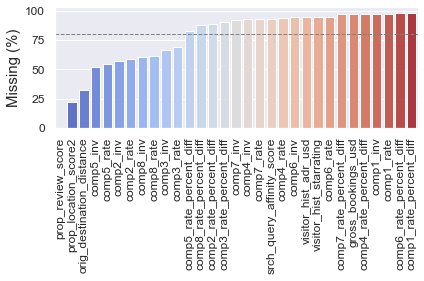

In [9]:
missing_data.sort_values("missing", inplace=True)

sns.set(rc={'figure.figsize':(12, 6)})

plot=sns.barplot(data = missing_data,
            x = "column",
            y = "missing",
            palette="coolwarm")
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.axhline(y=80, color='grey', linestyle='--', linewidth=1)
plot.set_ylabel('Missing (%)', size = 15)    
plot.set_xlabel('')
plt.tight_layout()
plt.show() 

# User behaviour

In [10]:
# Calculate the click-through rate (CTR) by position
click_rate_by_position = df.groupby('position')['click_bool'].mean()

# Calculate the booking rate by position
booking_rate_by_position = df.groupby('position')['booking_bool'].mean()


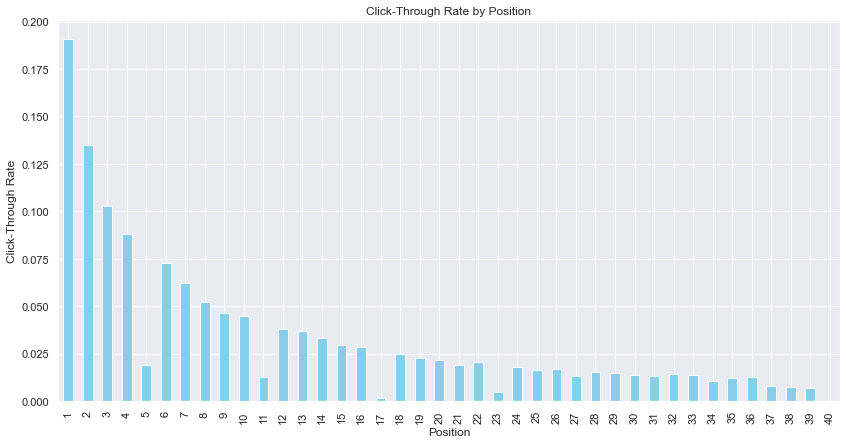

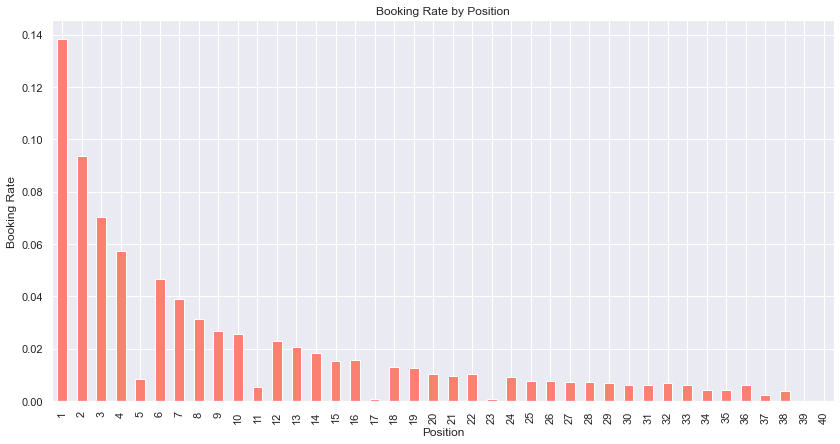

In [11]:
# Plot the CTR by position
plt.figure(figsize=(14, 7))
click_rate_by_position.plot(kind='bar', color='skyblue')
plt.title('Click-Through Rate by Position')
plt.xlabel('Position')
plt.ylabel('Click-Through Rate')
plt.show()

# Plot the booking rate by position
plt.figure(figsize=(14, 7))
booking_rate_by_position.plot(kind='bar', color='salmon')
plt.title('Booking Rate by Position')
plt.xlabel('Position')
plt.ylabel('Booking Rate')
plt.show()


# Basic EDA

In [12]:

# # Descriptive statistics
# print(df.describe())

# # Histograms for all numerical features
# df.hist(bins=15, figsize=(15, 10), layout=(54, 54))  # Adjust layout based on the number of columns
# plt.show()

# # Correlation heatmap
# plt.figure(figsize=(45, 40))
# sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
# plt.show()

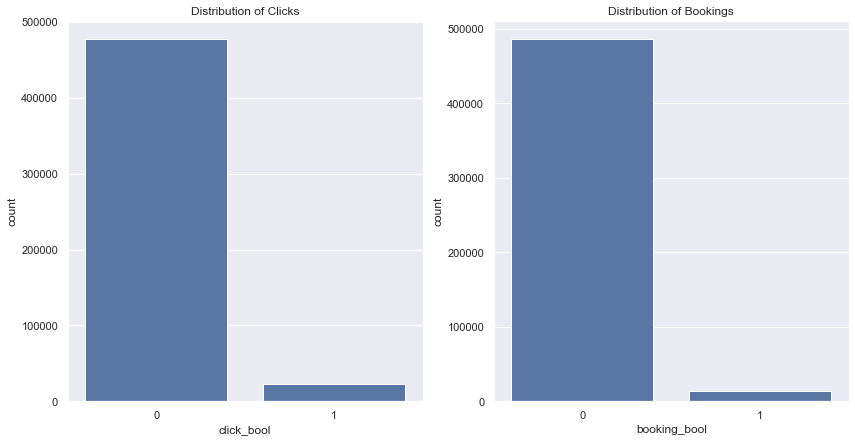

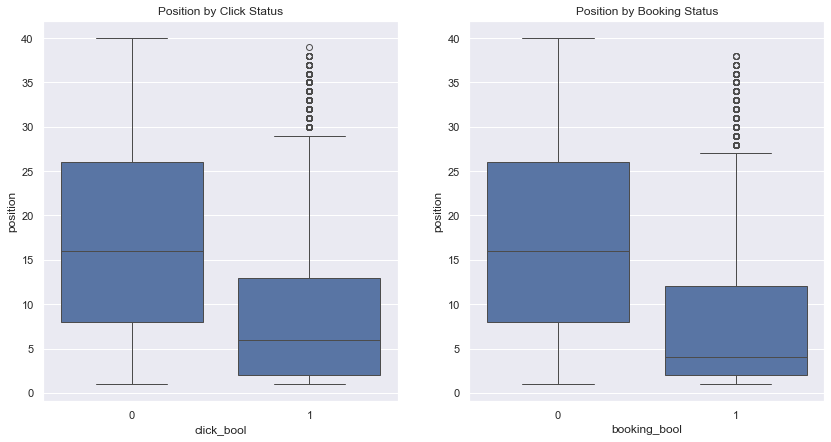

In [13]:
# Distribution of Clicks and Bookings
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
sns.countplot(x='click_bool', data=df, ax=ax[0])
sns.countplot(x='booking_bool', data=df, ax=ax[1])
ax[0].set_title('Distribution of Clicks')
ax[1].set_title('Distribution of Bookings')
plt.show()

# Position Analysis
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
sns.boxplot(x='click_bool', y='position', data=df, ax=ax[0])
sns.boxplot(x='booking_bool', y='position', data=df, ax=ax[1])
ax[0].set_title('Position by Click Status')
ax[1].set_title('Position by Booking Status')
plt.show()


# Outliers

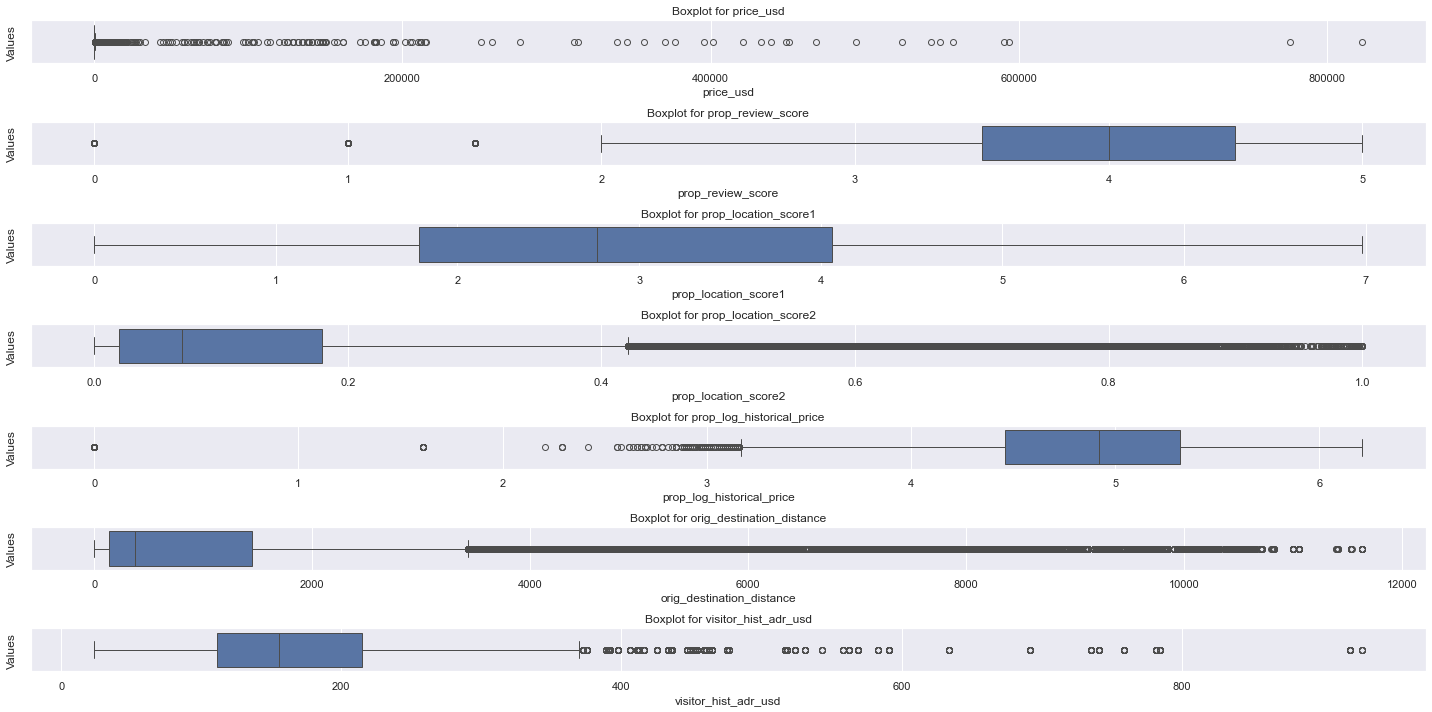

In [14]:
numerical_columns = [
    'price_usd',
    'prop_review_score',
    'prop_location_score1',
    'prop_location_score2',
    'prop_log_historical_price',
    'orig_destination_distance',
    'visitor_hist_adr_usd'
]

# Create a boxplot for each numerical column
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.ylabel('Values')

# Ensure the subplots do not overlap and the plot is displayed properly
plt.tight_layout()
plt.show()

# Per Day Bookings

/var/folders/lf/9kmpp6sj6r5336sq3nv74tjw0000gn/T/ipykernel_66753/2917813855.py:21: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  sns.barplot(x='date', y='booking_bool', hue='month', palette=palette, data=bookings_per_day, dodge=False)


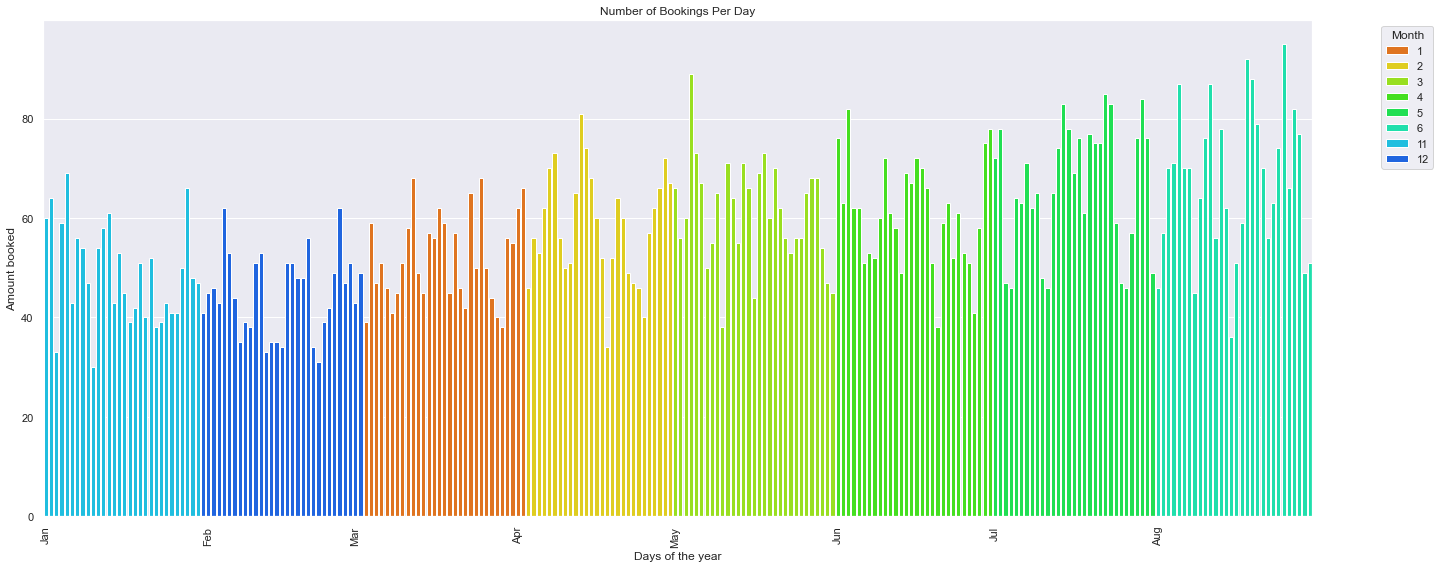

In [15]:
import matplotlib.dates as mdates

# Ensure the 'date_time' column is in datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Create a new column that captures just the date part of 'date_time'
df['date'] = df['date_time'].dt.date

# Group by the date and sum the 'booking_bool' column
bookings_per_day = df.groupby('date')['booking_bool'].sum().reset_index()

# Now we'll create a column for the month, which we'll use for color coding
bookings_per_day['month'] = pd.DatetimeIndex(bookings_per_day['date']).month

# Sort the data by date so that it plots correctly
bookings_per_day.sort_values('date', inplace=True)

# Create the plot
plt.figure(figsize=(20, 8))
palette = sns.color_palette("hsv", 12)  # Use a perceptually uniform color map
sns.barplot(x='date', y='booking_bool', hue='month', palette=palette, data=bookings_per_day, dodge=False)

# Improve the x-axis labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title('Number of Bookings Per Day')
plt.xlabel('Days of the year')
plt.ylabel('Amount booked')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

plt.tight_layout() 
plt.show()

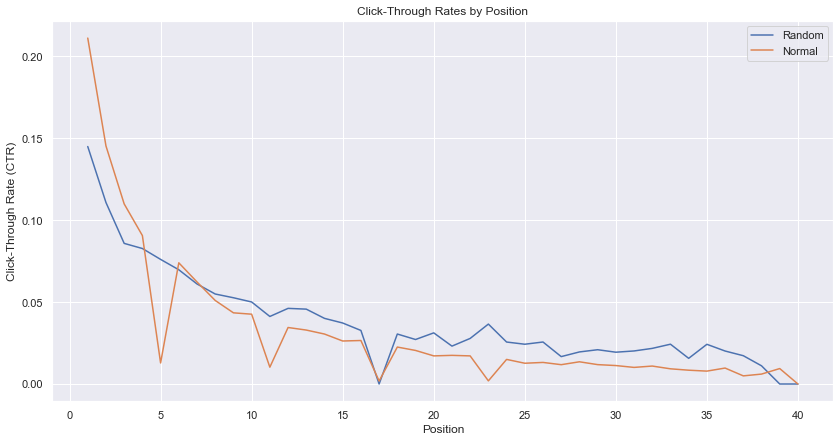

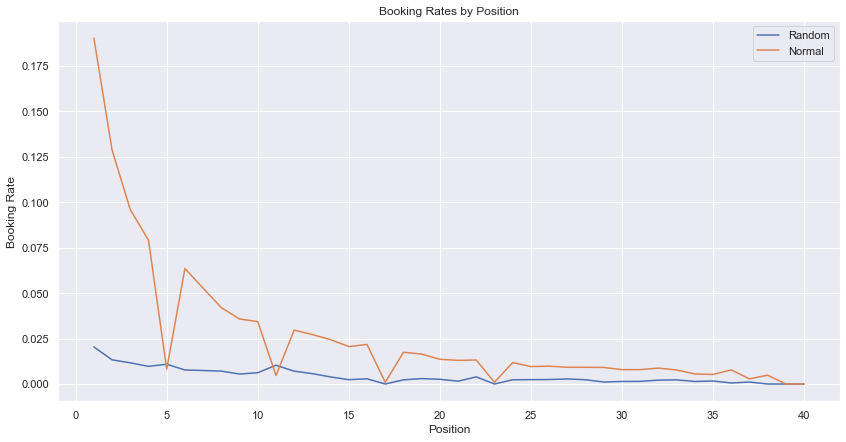

In [16]:
# Calculate the CTR and booking rate by position and random_bool
ctr_by_position_random = df[df['random_bool'] == 1].groupby('position')['click_bool'].mean()
ctr_by_position_normal = df[df['random_bool'] == 0].groupby('position')['click_bool'].mean()
booking_by_position_random = df[df['random_bool'] == 1].groupby('position')['booking_bool'].mean()
booking_by_position_normal = df[df['random_bool'] == 0].groupby('position')['booking_bool'].mean()

# Convert series to DataFrames for plotting
ctr_by_position_random = ctr_by_position_random.reset_index()
ctr_by_position_normal = ctr_by_position_normal.reset_index()
booking_by_position_random = booking_by_position_random.reset_index()
booking_by_position_normal = booking_by_position_normal.reset_index()

# Plotting Click-Through Rates by Position
plt.figure(figsize=(14, 7))
sns.lineplot(x='position', y='click_bool', data=ctr_by_position_random, label='Random')
sns.lineplot(x='position', y='click_bool', data=ctr_by_position_normal, label='Normal')
plt.title('Click-Through Rates by Position')
plt.xlabel('Position')
plt.ylabel('Click-Through Rate (CTR)')
plt.legend()
plt.show()

# Plotting Booking Rates by Position
plt.figure(figsize=(14, 7))
sns.lineplot(x='position', y='booking_bool', data=booking_by_position_random, label='Random')
sns.lineplot(x='position', y='booking_bool', data=booking_by_position_normal, label='Normal')
plt.title('Booking Rates by Position')
plt.xlabel('Position')
plt.ylabel('Booking Rate')
plt.legend()
plt.show()


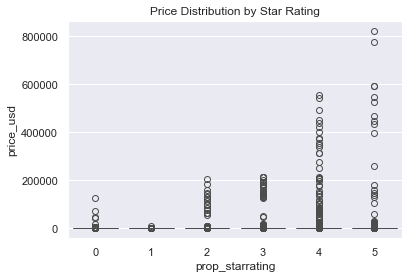

In [17]:
sns.boxplot(x='prop_starrating', y='price_usd', data=df)
plt.title('Price Distribution by Star Rating')
plt.show()

# Specific Column Plots

In [18]:
df_click = df[df["click_bool"]==1]
df_book = df[df["booking_bool"]==1]

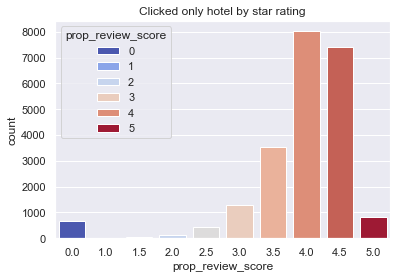

In [19]:
sns.countplot(x="prop_review_score", hue="prop_review_score", data=df_click, palette="coolwarm")
plt.title("Clicked only hotel by star rating")
plt.show()


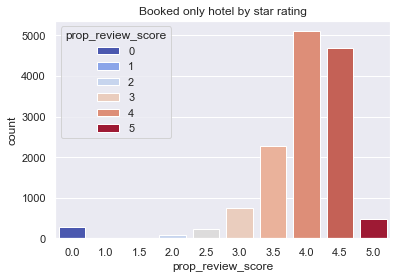

In [20]:
sns.countplot(x="prop_review_score", hue="prop_review_score", data=df_book, palette="coolwarm")
plt.title("Booked only hotel by star rating")
plt.show()


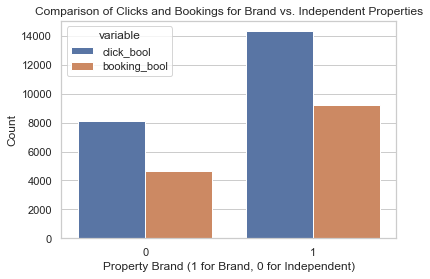

In [21]:
# Aggregate the data for plotting
brand_clicks_bookings = df.groupby('prop_brand_bool')[['click_bool', 'booking_bool']].sum().reset_index()

# Plot
sns.set_style("whitegrid")
brand_clicks_bookings_melted = pd.melt(brand_clicks_bookings, id_vars=['prop_brand_bool'], 
                                       value_vars=['click_bool', 'booking_bool'])

sns.barplot(x='prop_brand_bool', y='value', hue='variable', data=brand_clicks_bookings_melted)
plt.title('Comparison of Clicks and Bookings for Brand vs. Independent Properties')
plt.xlabel('Property Brand (1 for Brand, 0 for Independent)')
plt.ylabel('Count')
plt.show()


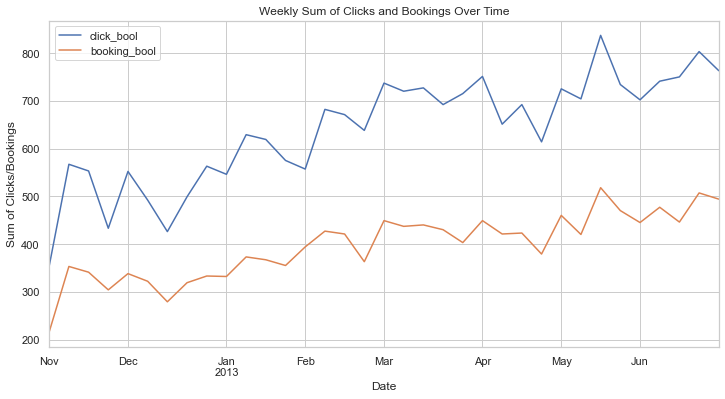

In [23]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.set_index('date_time', inplace=True)

df.resample('W')['click_bool', 'booking_bool'].sum().plot(figsize=(12, 6))
plt.title('Weekly Sum of Clicks and Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Sum of Clicks/Bookings')
plt.show()


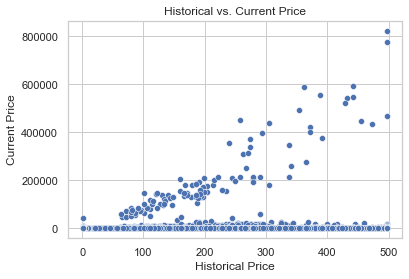

In [24]:
sns.scatterplot(x=np.exp(df['prop_log_historical_price']), y='price_usd', data=df)
plt.xlabel('Historical Price')
plt.ylabel('Current Price')
plt.title('Historical vs. Current Price')
plt.show()

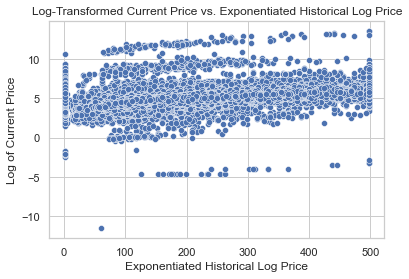

In [25]:
df['log_price_usd'] = np.log(df['price_usd'] + 0.00001)

# Now plot the exponentiated 'prop_log_historical_price' against the log-transformed 'price_usd'
sns.scatterplot(x=np.exp(df['prop_log_historical_price']), y='log_price_usd', data=df)
plt.xlabel('Exponentiated Historical Log Price')
plt.ylabel('Log of Current Price')
plt.title('Log-Transformed Current Price vs. Exponentiated Historical Log Price')
plt.show()

# Duplicate/negative checks

In [26]:
# Check for complete duplicates
duplicate_rows = df[df.duplicated()]

# Check for negative values in columns that should only have positives
negative_values_check = df[(df['price_usd'] < 0) | 
                           (df['prop_starrating'] < 0) |
                           (df['prop_review_score'] < 0) |
                           (df['prop_location_score1'] < 0) |
                           (df['prop_location_score2'] < 0) |
                           (df['orig_destination_distance'] < 0) |
                          (df['srch_adults_count'] < 0) | 
                                (df['srch_children_count'] < 0) | 
                                (df['srch_room_count'] < 0) | 
                                (df['srch_booking_window'] < 0) | 
                                (df['srch_length_of_stay'] < 0) | 
                                (df['prop_location_score1'] < 0) | 
                                (df['prop_location_score2'] < 0) |
                                (df['promotion_flag'] < 0) | 
                                (df['promotion_flag'] > 1)]

# Check for valid boolean fields
invalid_bools = df[(df['random_bool'] != 0) & (df['random_bool'] != 1) |
                   (df['srch_saturday_night_bool'] != 0) & (df['srch_saturday_night_bool'] != 1)]

# Output the results
print(f"Duplicate Rows: {duplicate_rows.shape[0]}")
print(f"Negative Values Issues: {negative_values_check.shape[0]}")
print(f"Invalid Booleans: {invalid_bools.shape[0]}")

Duplicate Rows: 0
Negative Values Issues: 0
Invalid Booleans: 0


# Correlation Matrix

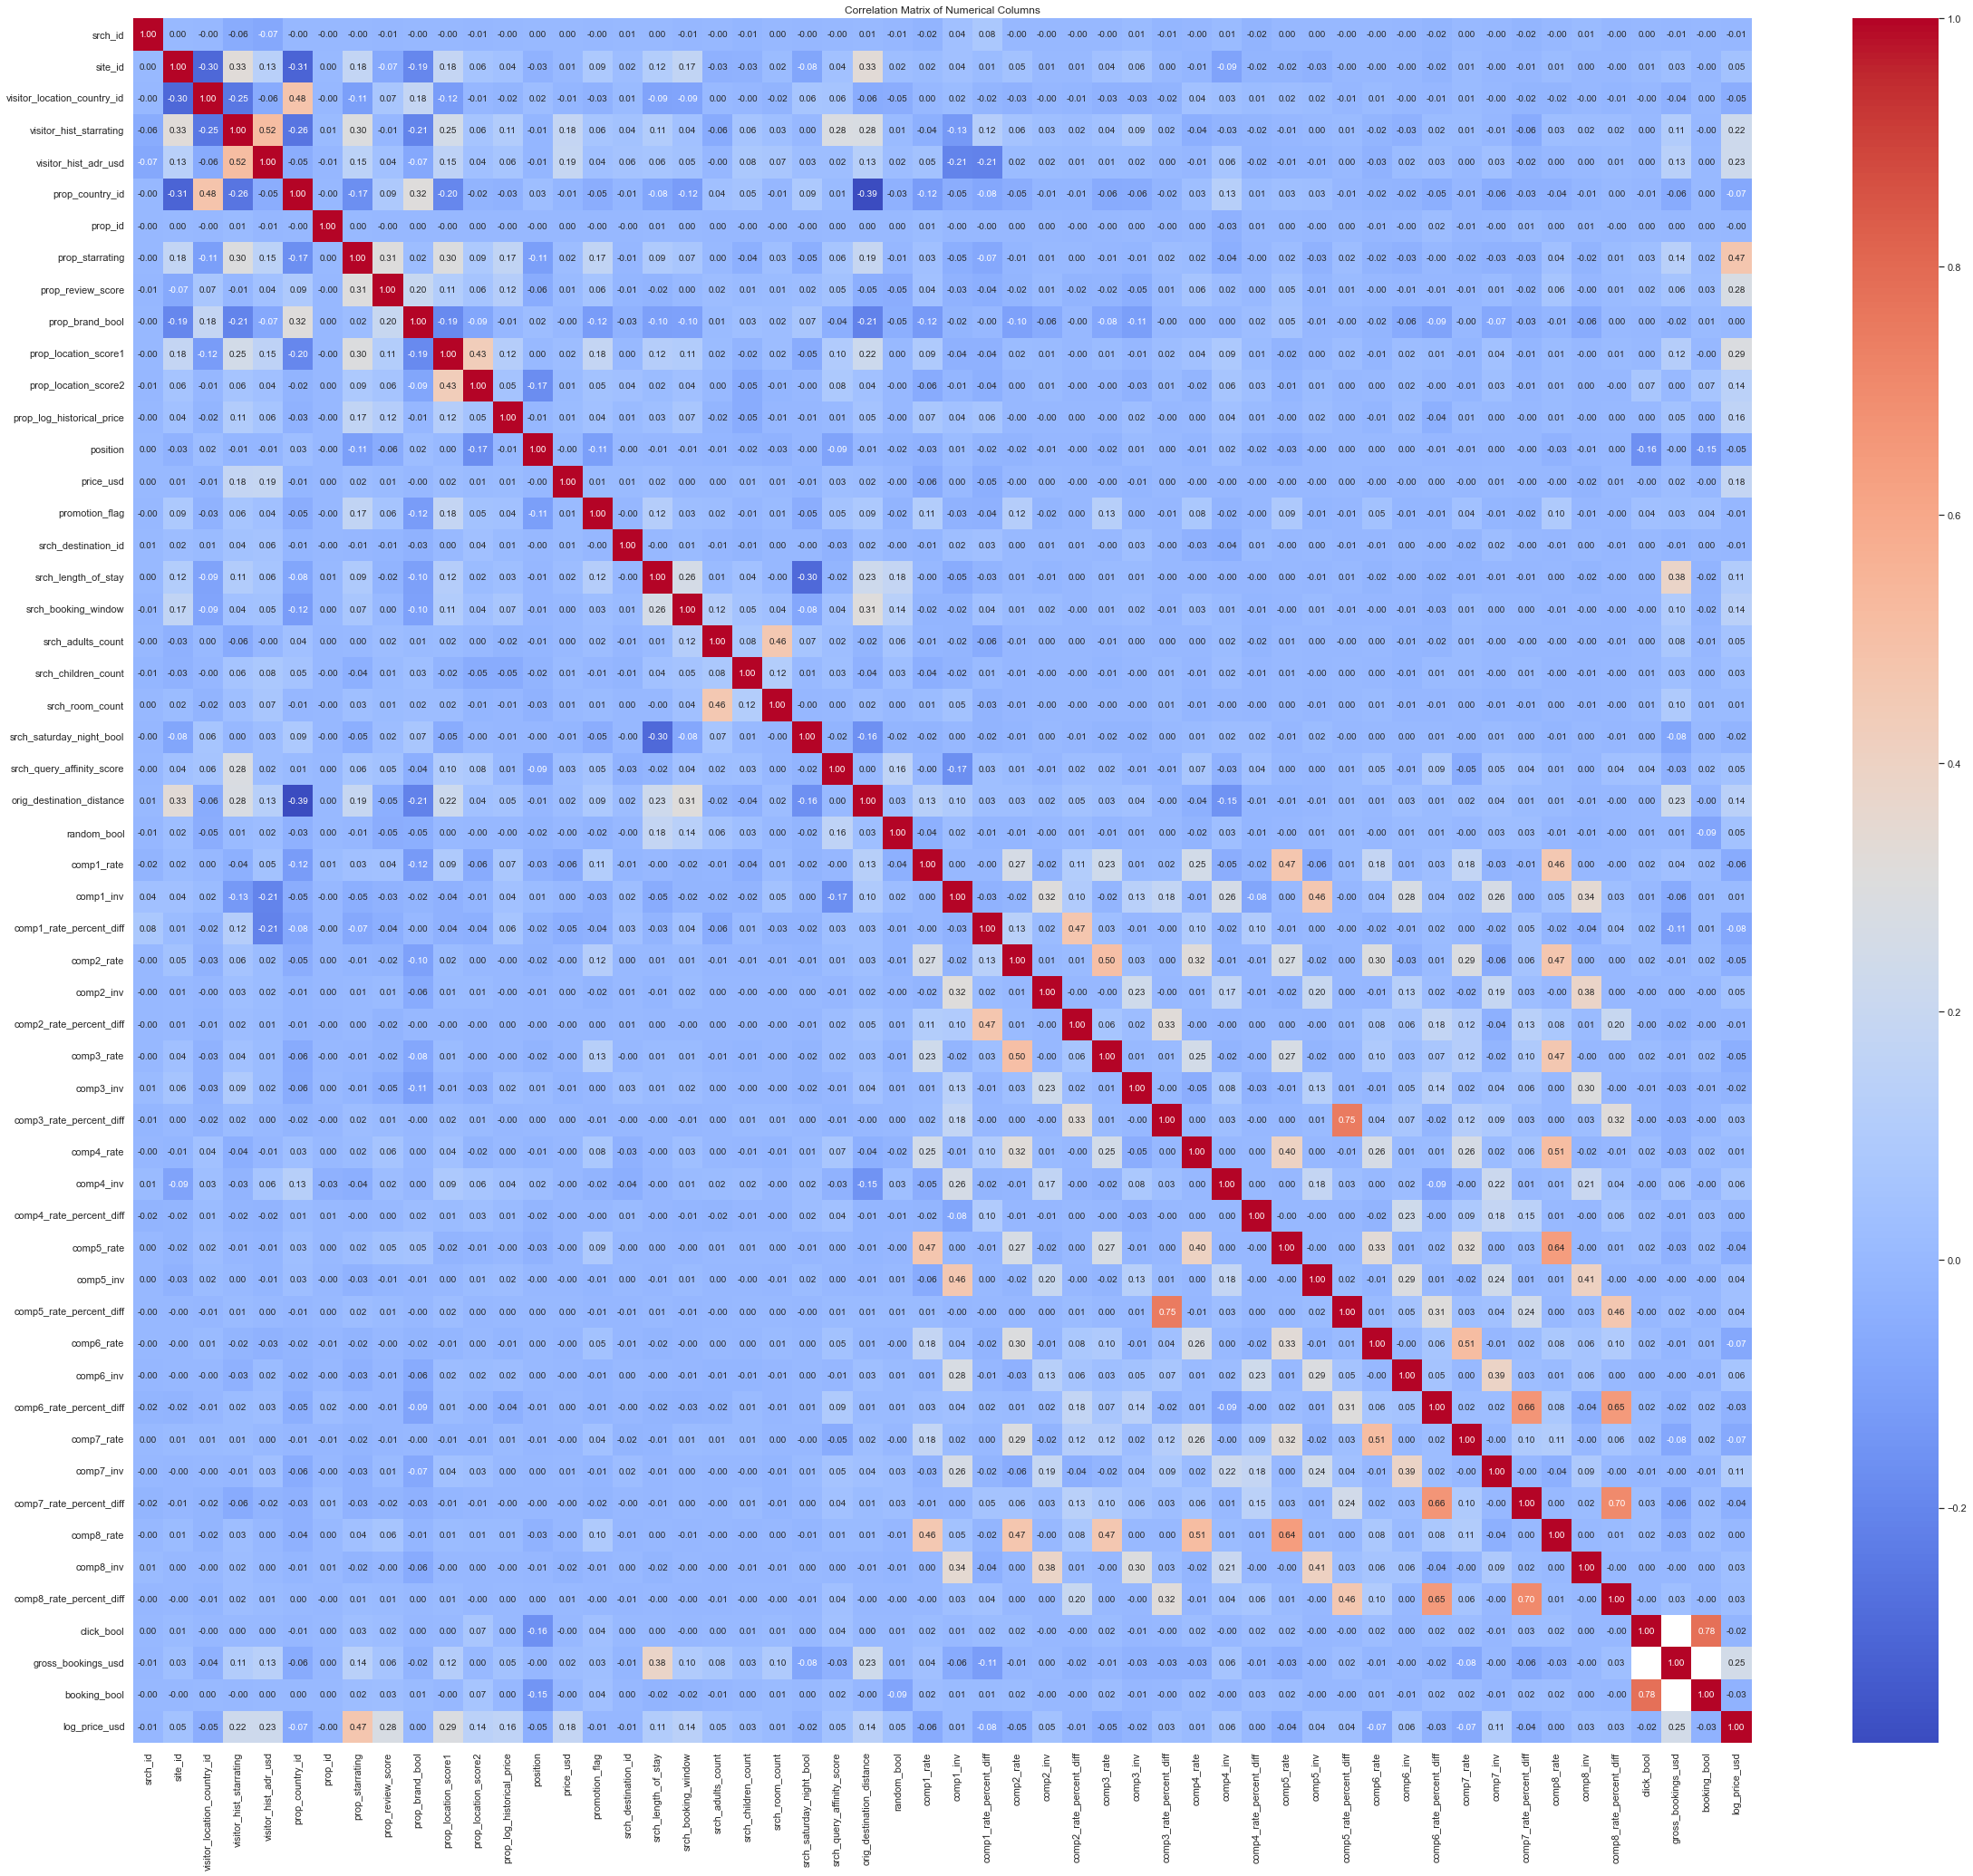

In [27]:
# Select only the numerical columns for the correlation matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_cols.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(40, 35))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

# Dropping Largely Missing Columns

In [ ]:
threshold = 0.5

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean()

# Find columns with a missing percentage less than the threshold
columns_to_keep = missing_percentage[missing_percentage <= threshold].index

# Drop columns that have missing data above the threshold
df_reduced = df[columns_to_keep]

# Alternatively, directly drop columns where the missing data exceeds the threshold
df_reduced = df.loc[:, df.isnull().mean() <= threshold]

In [ ]:
df_reduced.isnull().mean()

In [ ]:
df_reduced

In [ ]:
# Correlation heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(df_reduced.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [ ]:
df_reduced = df_reduced.dropna()


In [ ]:
df_reduced

# Feature extraction